In [1]:
import operator
import collections
import itertools

In [2]:
testlines = '''x00: 1
x01: 1
x02: 1
y00: 0
y01: 1
y02: 0

x00 AND y00 -> z00
x01 XOR y01 -> z01
x02 OR y02 -> z02'''

In [3]:
testlinesb = '''x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj'''

In [4]:
with open('day24input.txt') as fp:
    data = fp.read()

## Part 1 ##

In [5]:
ops = {'XOR': operator.xor, 'OR': operator.or_, 'AND': operator.and_}
reverse_ops = {operator.xor: 'XOR', operator.or_: 'OR', operator.and_: 'AND'}
def parse(lines):
    mapping = {}
    initlines, gatelines = lines.split('\n\n')
    for line in initlines.splitlines():
        a,b = line.split(':')
        key = a.strip()
        if key in mapping:
            raise ValueError(f'Duplicate key: {key}')
        mapping[key] = ((int(b),), None)
    for line in gatelines.splitlines():
        lhs, rhs = line.split('->')
        a, gate, b = lhs.split()
        key = rhs.strip()
        if key in mapping:
            raise ValueError(f'Duplicate key: {key}')
        mapping[key] = ((a, b), ops[gate])
    return mapping

In [6]:
def get_val(key, mapping, vals):
    if key in vals:
        return vals[key]
    t, op = mapping[key]
    if op is None:
        vals[key] = t[0]
        return vals[key]
    a = get_val(t[0], mapping, vals)
    b = get_val(t[1], mapping, vals)
    vals[key] = op(a,b)
    return vals[key]

In [7]:
def part1(lines):
    mapping = parse(lines)
    zkeys = reversed(sorted([key for key in mapping if key[0] == 'z']))
    vals = {}
    binary = ''.join([str(get_val(zkey, mapping, vals)) for zkey in zkeys])
    return int(binary, 2)

In [8]:
assert(4 == part1(testlines))

In [9]:
assert(2024 == part1(testlinesb))

In [10]:
part1(data)

56729630917616

## Part 2 ##

Switching 4 pairs of outputs by brute force isn't feasible. It's probably more a matter of looking for bit flips by sending in particular values of x** and y** and looking for bits in the sum that get messed up.

In [11]:
mapping = parse(data)

In [12]:
xkeys = reversed(sorted([key for key in mapping if key[0] == 'x']))
ykeys = reversed(sorted([key for key in mapping if key[0] == 'y']))

In [13]:
vals = {}
xval = ''.join([str(mapping[xkey][0][0]) for xkey in xkeys])
yval = ''.join([str(mapping[ykey][0][0]) for ykey in ykeys])
xval, yval

('111101110101000100001111111001110010110100011',
 '101001010111001000011100001101111111011001101')

In [14]:
xval = ''.join(str(mapping[xkey][0][0]) for xkey in reversed([key for key in mapping if key[0] == 'x']))
yval = ''.join(str(mapping[ykey][0][0]) for ykey in reversed([key for key in mapping if key[0] == 'y']))
print(xval, yval)
x, y = int(xval, 2), int(yval, 2)
print(x, y, x+y)
print(format(x+y, 'b'))

111101110101000100001111111001110010110100011 101001010111001000011100001101111111011001101
33990941402531 22738689785549 56729631188080
1100111001100001100101100000111110010001110000


In [15]:
zkeys = reversed(sorted([key for key in mapping if key[0] == 'z']))
vals = {}
wrong_binary = ''.join([str(get_val(zkey, mapping, vals)) for zkey in zkeys])
right_binary = format(x+y, 'b')
print(wrong_binary)
print(right_binary)
for i in range(len(wrong_binary)):
    bit = - (i+1)
    if wrong_binary[bit] != right_binary[bit]:
        print(f'First wrong bit: {i:02d}')
        break

1100111001100001100101011111111100001111110000
1100111001100001100101100000111110010001110000
First wrong bit: 07


Everything should be correct for z06, z05, ..., z00, I'd think

In [16]:
def get_tree(mapping, curr):
    tree = {}
    tree['val'] = curr
    t, op = mapping[curr]
    if op is None:
        return tree
    tree['op'] = reverse_ops[op]
    tree['left'] = get_tree(mapping, t[0])
    tree['right'] = get_tree(mapping, t[1])
    return tree

In [17]:
get_tree(mapping, 'z00')

{'val': 'z00', 'op': 'XOR', 'left': {'val': 'x00'}, 'right': {'val': 'y00'}}

In [18]:
get_tree(mapping, 'z01')

{'val': 'z01',
 'op': 'XOR',
 'left': {'val': 'ghh',
  'op': 'XOR',
  'left': {'val': 'x01'},
  'right': {'val': 'y01'}},
 'right': {'val': 'gnn',
  'op': 'AND',
  'left': {'val': 'x00'},
  'right': {'val': 'y00'}}}

In [19]:
get_tree(mapping, 'z02')

{'val': 'z02',
 'op': 'XOR',
 'left': {'val': 'msp',
  'op': 'OR',
  'left': {'val': 'nck',
   'op': 'AND',
   'left': {'val': 'x01'},
   'right': {'val': 'y01'}},
  'right': {'val': 'qhq',
   'op': 'AND',
   'left': {'val': 'ghh',
    'op': 'XOR',
    'left': {'val': 'x01'},
    'right': {'val': 'y01'}},
   'right': {'val': 'gnn',
    'op': 'AND',
    'left': {'val': 'x00'},
    'right': {'val': 'y00'}}}},
 'right': {'val': 'fwk',
  'op': 'XOR',
  'left': {'val': 'y02'},
  'right': {'val': 'x02'}}}

In [20]:
tree = get_tree(mapping, 'z07')
tree

{'val': 'z07',
 'op': 'OR',
 'left': {'val': 'njc',
  'op': 'AND',
  'left': {'val': 'mkm',
   'op': 'OR',
   'left': {'val': 'dvw',
    'op': 'AND',
    'left': {'val': 'fsw',
     'op': 'OR',
     'left': {'val': 'hjv',
      'op': 'AND',
      'left': {'val': 'sws',
       'op': 'OR',
       'left': {'val': 'qgg',
        'op': 'AND',
        'left': {'val': 'mpq',
         'op': 'XOR',
         'left': {'val': 'x04'},
         'right': {'val': 'y04'}},
        'right': {'val': 'dvh',
         'op': 'OR',
         'left': {'val': 'djp',
          'op': 'AND',
          'left': {'val': 'gmp',
           'op': 'OR',
           'left': {'val': 'gpn',
            'op': 'AND',
            'left': {'val': 'x02'},
            'right': {'val': 'y02'}},
           'right': {'val': 'vbs',
            'op': 'AND',
            'left': {'val': 'fwk',
             'op': 'XOR',
             'left': {'val': 'y02'},
             'right': {'val': 'x02'}},
            'right': {'val': 'msp',
         

In [21]:
mapping['z07']

(('njc', 'kbk'), <function _operator.or_(a, b, /)>)

In [22]:
mapping['njc']

(('mkm', 'tgj'), <function _operator.and_(a, b, /)>)

In [23]:
mapping['tgj']

(('y07', 'x07'), <function _operator.xor(a, b, /)>)

In [24]:
mapping['kbk']

(('y07', 'x07'), <function _operator.and_(a, b, /)>)

In [25]:
last_xkey = int(sorted([key for key in mapping if key[0] == 'x'])[-1][1:])
last_ykey = int(sorted([key for key in mapping if key[0] == 'y'])[-1][1:])
last_zkey = int(sorted([key for key in mapping if key[0] == 'z'])[-1][1:])
last_xkey, last_ykey, last_zkey

(44, 44, 45)

In [26]:
def set_xy(x, y):
    vals = {}
    xbin, ybin = format(x, 'b'), format(y, 'b')
    xmax, ymax = len(xbin), len(ybin)
    for i in range(xmax):
        vals[f'x{i:02d}'] = int(xbin[xmax - i - 1])
    for i in range(xmax, last_xkey+1):
        vals[f'x{i:02d}'] = 0
    for i in range(ymax):
        vals[f'y{i:02d}'] = int(ybin[ymax -i - 1])
    for i in range(ymax, last_ykey+1):
        vals[f'y{i:02d}'] = 0
    return vals

In [27]:
def calcz(mapping, vals):
    zkeys = reversed(sorted([key for key in mapping if key[0] == 'z']))
    binary = ''.join([str(get_val(zkey, mapping, vals)) for zkey in zkeys])
    return int(binary, 2)

In [28]:
def addfn(mapping, a, b):
    vals = set_xy(a, b)
    z = calcz(mapping, vals)
    return z

In [29]:
vals = set_xy(1<<3, 0)

In [30]:
calcz(mapping, vals)

8

In [31]:
for i in range(1, last_xkey):
    z = addfn(mapping, 1<<i, 0)
    if z != 1<<i:
        print(i, z, 1<<i)

7 256 128
13 16384 8192
18 524288 262144
26 134217728 67108864


In [32]:
mapping['z08']

(('btr', 'bjm'), <function _operator.xor(a, b, /)>)

In [33]:
mapping['bjm']

(('tgj', 'mkm'), <function _operator.xor(a, b, /)>)

In [34]:
mapping['tgj']

(('y07', 'x07'), <function _operator.xor(a, b, /)>)

In [35]:
tree08 = get_tree(mapping, 'z08')
tree08

{'val': 'z08',
 'op': 'XOR',
 'left': {'val': 'btr',
  'op': 'XOR',
  'left': {'val': 'x08'},
  'right': {'val': 'y08'}},
 'right': {'val': 'bjm',
  'op': 'XOR',
  'left': {'val': 'tgj',
   'op': 'XOR',
   'left': {'val': 'y07'},
   'right': {'val': 'x07'}},
  'right': {'val': 'mkm',
   'op': 'OR',
   'left': {'val': 'dvw',
    'op': 'AND',
    'left': {'val': 'fsw',
     'op': 'OR',
     'left': {'val': 'hjv',
      'op': 'AND',
      'left': {'val': 'sws',
       'op': 'OR',
       'left': {'val': 'qgg',
        'op': 'AND',
        'left': {'val': 'mpq',
         'op': 'XOR',
         'left': {'val': 'x04'},
         'right': {'val': 'y04'}},
        'right': {'val': 'dvh',
         'op': 'OR',
         'left': {'val': 'djp',
          'op': 'AND',
          'left': {'val': 'gmp',
           'op': 'OR',
           'left': {'val': 'gpn',
            'op': 'AND',
            'left': {'val': 'x02'},
            'right': {'val': 'y02'}},
           'right': {'val': 'vbs',
            'o

In [36]:
for i in range(1, last_ykey):
    z = addfn(mapping, 0, 1<<i)
    if z != 1<<i:
        print(i, z, 1<<i)

7 256 128
13 16384 8192
18 524288 262144
26 134217728 67108864


In [37]:
for i in range(1, last_ykey):
    z = addfn(mapping, 1<<i, 1<<i)
    if z != 2*1<<i:
        print(i, z, 2*1<<i)

6 256 128
7 128 256
12 16384 8192
17 524288 262144
18 262144 524288
26 67108864 134217728


In [38]:
1<<6

64

In [39]:
addfn(mapping, 1<<6, 1<<6)

256

In [40]:
format(1<<6, 'b')

'1000000'

In [41]:
format(256, 'b'), format(128, 'b')

('100000000', '10000000')

In [42]:
1<<8

256

In [43]:
mapping['z08']

(('btr', 'bjm'), <function _operator.xor(a, b, /)>)

In [44]:
mapping['btr']

(('x08', 'y08'), <function _operator.xor(a, b, /)>)

In [45]:
mapping['bjm']

(('tgj', 'mkm'), <function _operator.xor(a, b, /)>)

In [46]:
mapping['tgj'], mapping['mkm']

((('y07', 'x07'), <function _operator.xor(a, b, /)>),
 (('dvw', 'cbn'), <function _operator.or_(a, b, /)>))

In [47]:
import graphviz

In [48]:
def display_tree(mapping, root, depth=None):
    d = graphviz.Digraph()
    keys = [root]
    n = 0
    while keys:
        key = keys.pop()
        n += 1
        if depth is not None and n > depth:
            break
        t, op = mapping[key]
        if op is None:
            continue
        opname = f'{reverse_ops[op]} {key}'
        d.edge(key, opname)
        d.edge(opname, t[0])
        d.edge(opname, t[1])
        keys.append(t[0])
        keys.append(t[1])
    return d

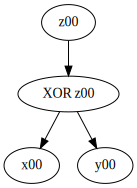

In [49]:
display_tree(mapping, 'z00')

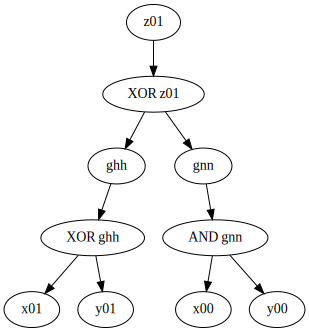

In [50]:
display_tree(mapping, 'z01')

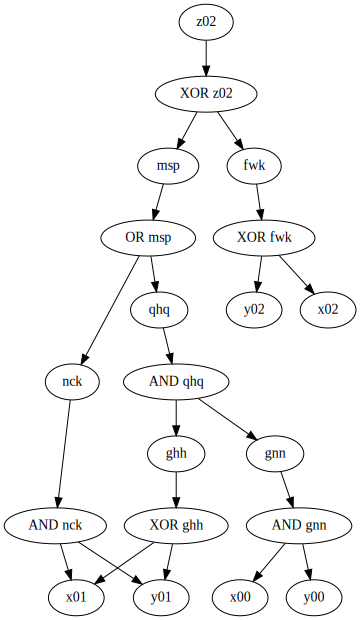

In [51]:
display_tree(mapping, 'z02')

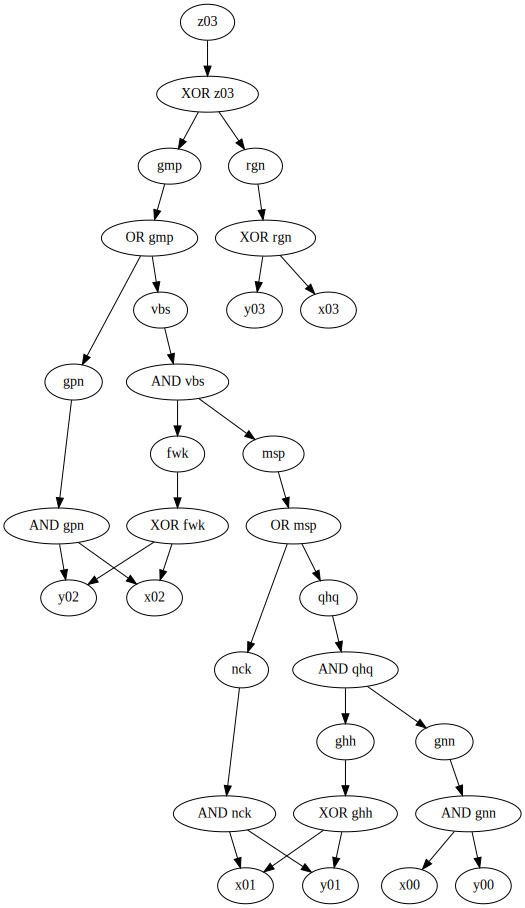

In [52]:
display_tree(mapping, 'z03')

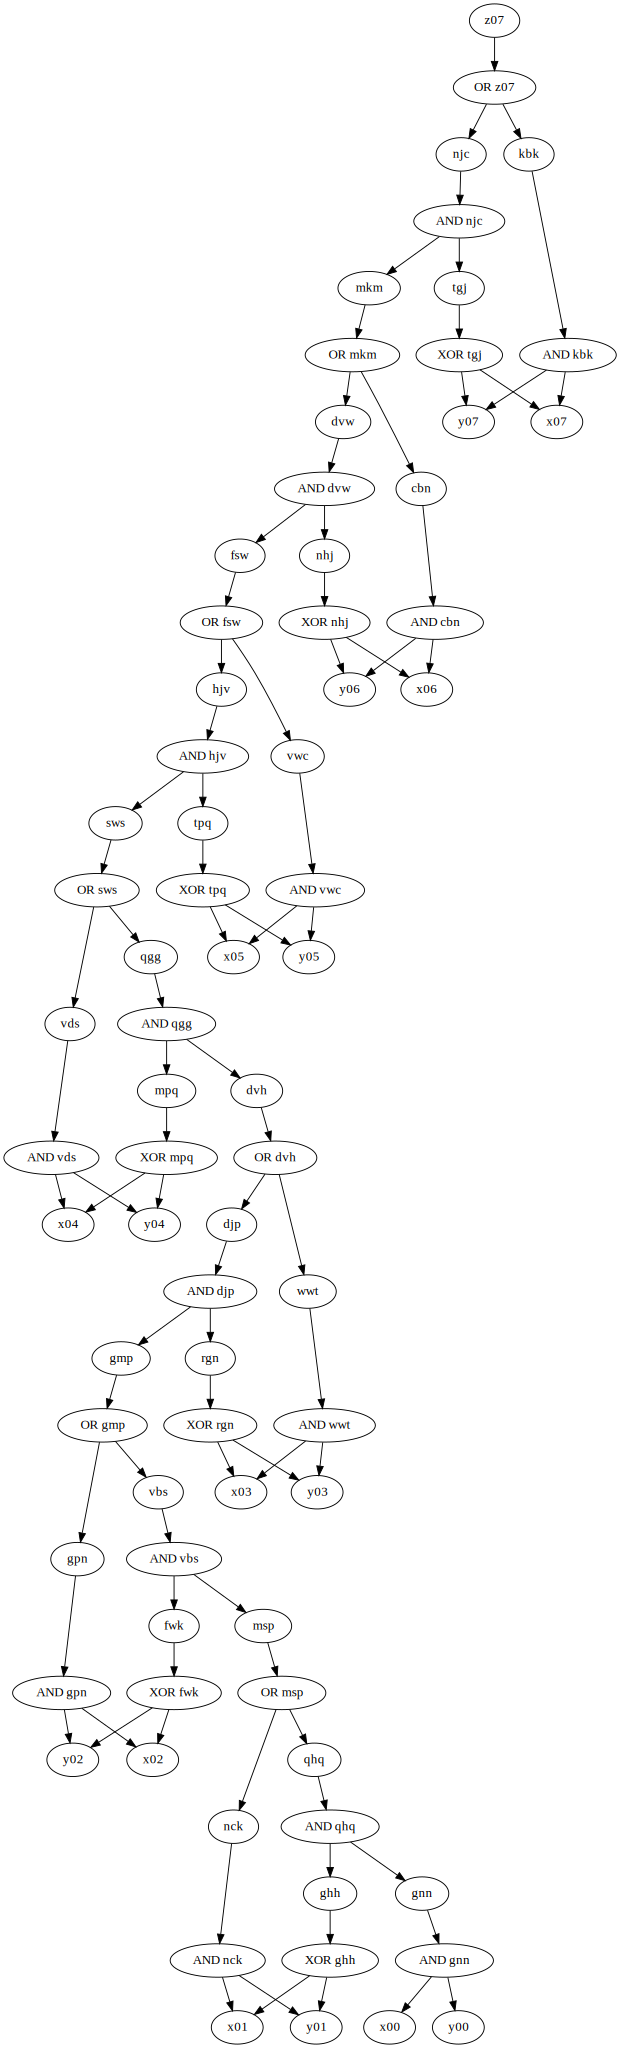

In [53]:
display_tree(mapping, 'z07')

Z's should start w/ an XOR, not an OR.  The correct pattern is root XOR, with two nodes below, and one of those nodes is an XOR w/ y07 and x07 and the other node is an OR.  The other node isn't in this tree.  How about z08?

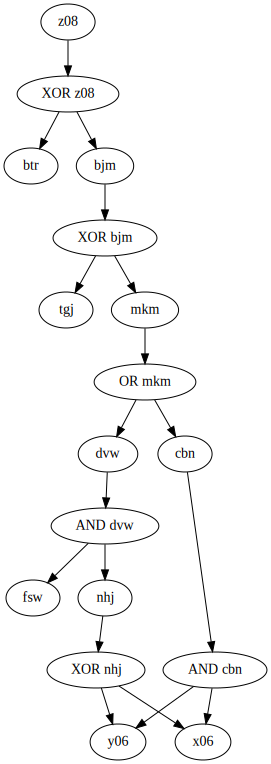

In [54]:
display_tree(mapping, 'z08', depth=10)

It looks like bjm is a candidate.

In [55]:
mapping2 = mapping.copy()

In [56]:
mapping2['z07'], mapping2['bjm'] = mapping2['bjm'], mapping2['z07']

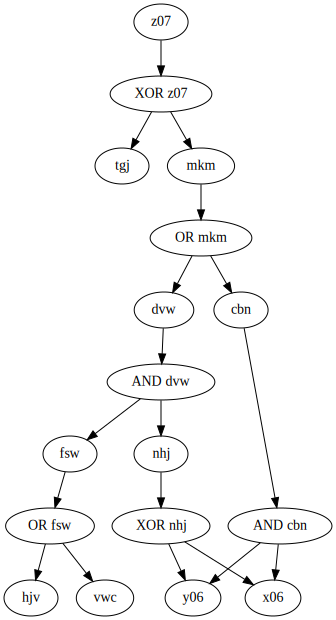

In [57]:
display_tree(mapping2, 'z07', depth=10)

In [58]:
for i in range(1, last_ykey):
    z = addfn(mapping2, 0, 1<<i)
    if z != 1<<i:
        print(i, z, 1<<i)

13 16384 8192
18 524288 262144
26 134217728 67108864


In [59]:
mapping2['z13']

(('pmv', 'rbk'), <function _operator.and_(a, b, /)>)

So z13 is an AND, not an XOR, so it's also a problem.

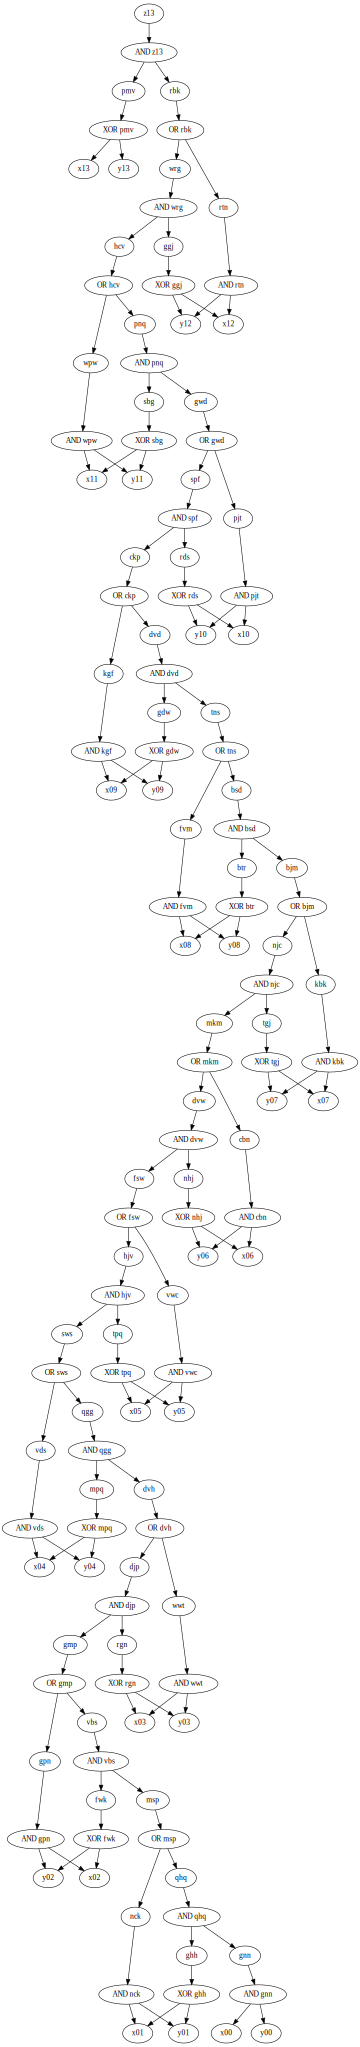

In [60]:
display_tree(mapping2, 'z13')

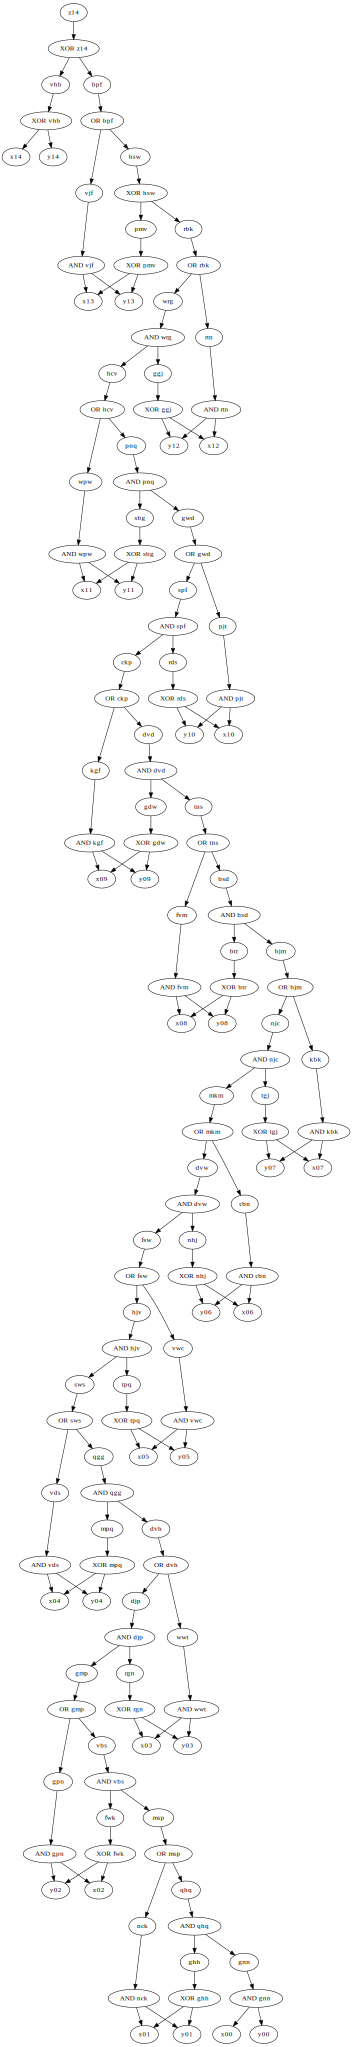

In [61]:
display_tree(mapping2, 'z14')

Looks like we should swap hsw and z13.

In [62]:
mapping3 = mapping2.copy()
mapping3['z13'], mapping3['hsw'] = mapping3['hsw'], mapping3['z13']

In [63]:
for i in range(1, last_ykey):
    z = addfn(mapping3, 0, 1<<i)
    if z != 1<<i:
        print(i, z, 1<<i)

18 524288 262144
26 134217728 67108864


In [64]:
mapping3['z18']

(('y18', 'x18'), <function _operator.and_(a, b, /)>)

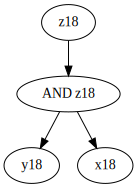

In [65]:
display_tree(mapping3, 'z18')

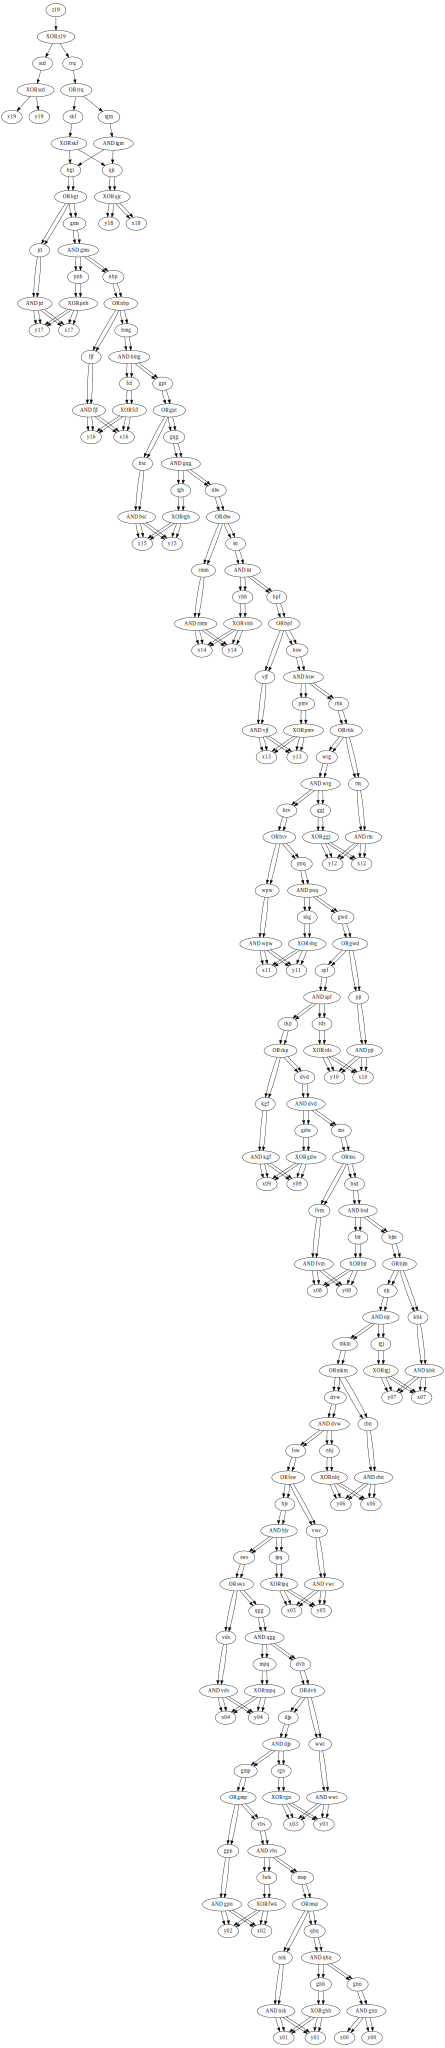

In [66]:
display_tree(mapping3, 'z19')

In [67]:
mapping4 = mapping3.copy()
mapping4['z18'], mapping4['skf'] = mapping4['skf'], mapping4['z18']
for i in range(1, last_ykey):
    z = addfn(mapping4, 0, 1<<i)
    if z != 1<<i:
        print(i, z, 1<<i)

26 134217728 67108864


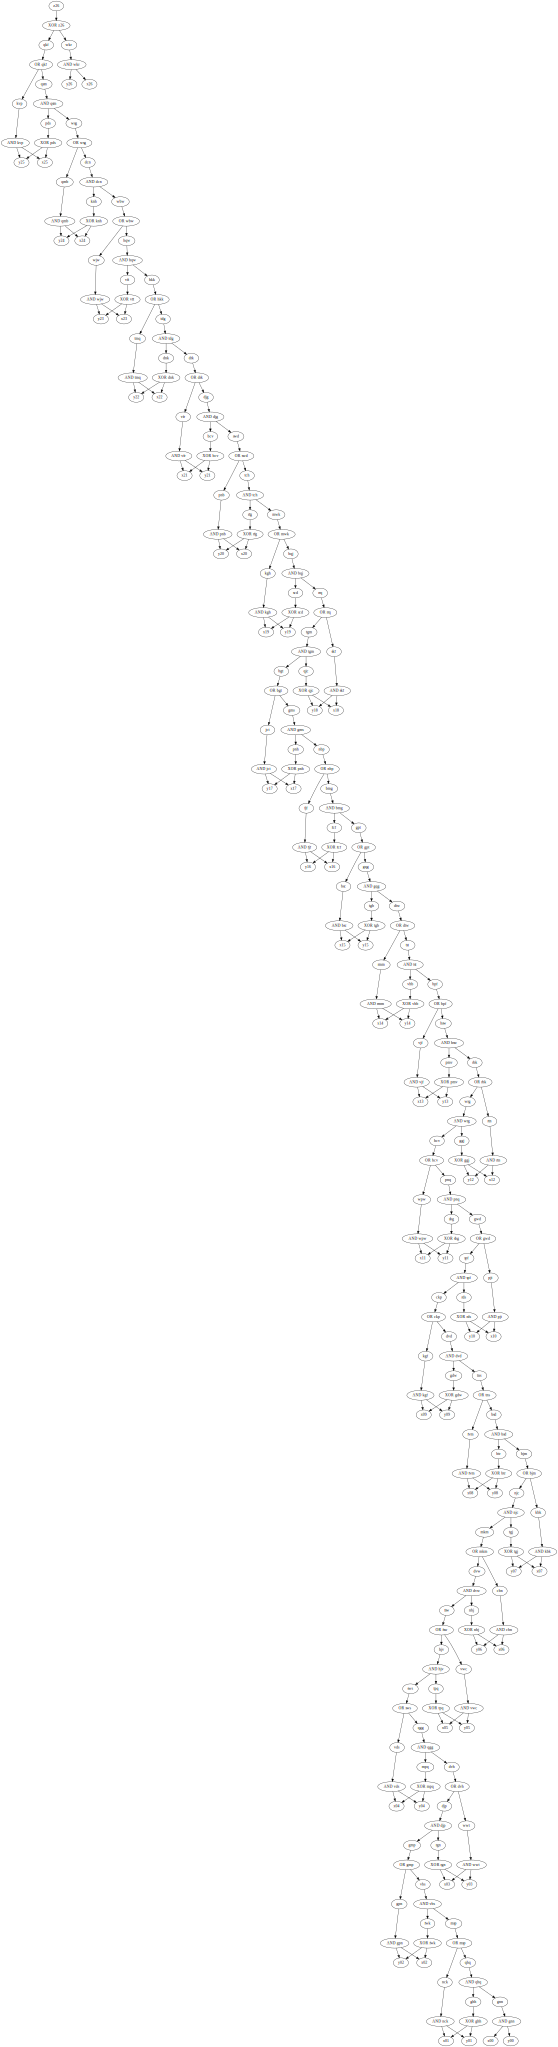

In [68]:
display_tree(mapping4, 'z26')

The z26 node is fine, but wkr should be an XOR, not an AND. Let's see if we can find the proper node in the z27 tree? 

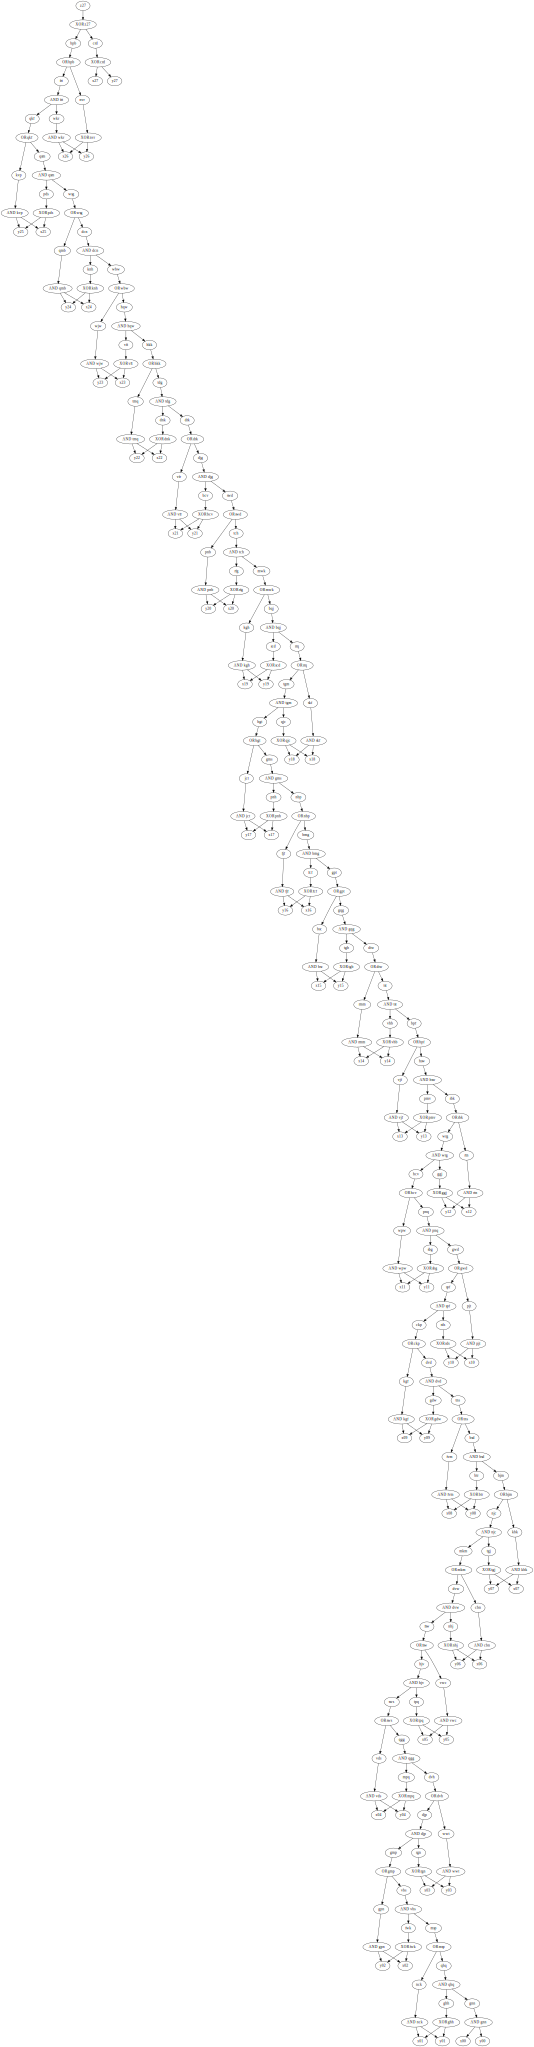

In [69]:
display_tree(mapping4, 'z27')

Try swapping wkr and nvr, since nvr has the XOR we'd expect in z26.

In [70]:
mapping5 = mapping4.copy()
mapping5['wkr'], mapping5['nvr'] = mapping5['nvr'], mapping5['wkr']
for i in range(1, last_ykey):
    z = addfn(mapping5, 0, 1<<i)
    if z != 1<<i:
        print(i, z, 1<<i)

In [71]:
','.join(sorted(['wkr', 'nvr', 'z18', 'skf', 'z13', 'hsw', 'z07', 'bjm']))

'bjm,hsw,nvr,skf,wkr,z07,z13,z18'